# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [ ]:
# Loading the dataset that has been labeled for clustering
data = pd.read_csv('/content/clustered_customer_data.csv')
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Cluster,Cluster_PCA
0,5524,1957,2,4,58138.0,0,0,04-09-2012,58,635,...,0,0,0,0,3,11,1,68.0,2,1
1,2174,1954,2,4,46344.0,1,1,08-03-2014,38,11,...,0,0,0,0,3,11,0,71.0,0,2
2,4141,1965,2,5,71613.0,0,0,21-08-2013,26,426,...,0,0,0,0,3,11,0,60.0,1,2
3,6182,1984,2,5,26646.0,1,0,10-02-2014,26,11,...,0,0,0,0,3,11,0,41.0,0,0
4,5324,1981,4,3,58293.0,1,0,19-01-2014,94,173,...,0,0,0,0,3,11,0,44.0,0,0


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [ ]:
# Separating features (X) and targets (y)
X = data.drop(['Cluster', 'ID', 'Dt_Customer'], axis=1)  # Remove irrelevant columns
y = data['Cluster']  # Make cluster as target

# Divide the data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Displays training and test data dimension information
print(f"Training set: {X_train.shape}, Test set: {X_test.shape}")

Training set: (1568, 29), Test set: (672, 29)


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [ ]:
# Create model Random Forest
model = RandomForestClassifier(random_state=42)

# Train model
model.fit(X_train, y_train)

# Making predictions on test data
y_pred = model.predict(X_test)

In [ ]:
y_pred

array([1, 1, 0, 2, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 2,
       2, 0, 1, 0, 1, 0, 1, 1, 0, 0, 2, 0, 2, 0, 1, 1, 0, 1, 2, 2, 2, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 1, 1, 1, 1, 1, 2, 1,
       2, 0, 0, 0, 0, 0, 1, 0, 2, 2, 2, 2, 0, 0, 0, 2, 1, 1, 2, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 2, 0, 2, 2, 1, 0, 1, 2, 0, 1, 1, 0, 0, 1,
       0, 2, 1, 0, 0, 0, 1, 2, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 2, 0, 2, 0, 1, 1, 2, 0, 2, 0, 1, 1, 2, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 2, 1, 1, 0, 2, 2, 0, 1,
       1, 2, 1, 1, 1, 1, 1, 0, 1, 2, 0, 2, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 2, 1, 2, 2, 0, 1, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2,
       0, 1, 2, 2, 1, 0, 1, 2, 1, 0, 0, 1, 0, 2, 0, 2, 1, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 2, 1, 1, 0, 0,
       1, 1, 2, 0, 1, 1, 0, 1, 0, 0, 2, 1, 0, 2, 0, 0, 2, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 2, 0, 0, 2, 1, 1, 0, 1,

Tulis narasi atau penjelasan algoritma yang Anda gunakan.

Random forest menggabungkan beberapa pohon keputusan (decision tree) untuk membuat prediksi. Setiap pohon keputusan memberikan prediksi masing-masing, dan prediksi akhir diambil berdasarkan pemungutan suara mayoritas dari semua pohon tersebut. Random forest sangat tahan terhadap overfitting dan cenderung menghasilkan akurasi yang baik tanpa perlu penyesuaian parameter yang rumit.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

Accuracy: 0.9508928571428571
F1-Score: 0.9504782057344265
Precision: 0.9508879948591688
Recall: 0.9508928571428571


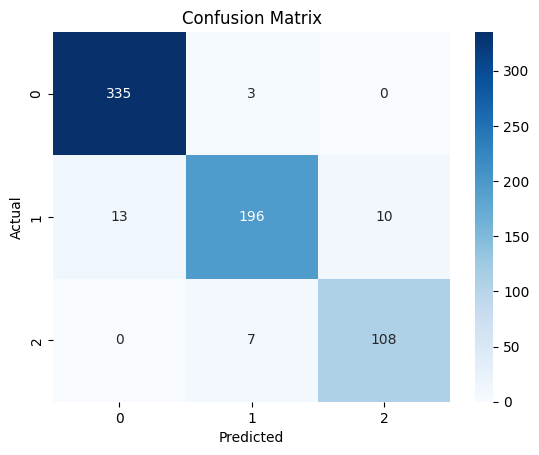

In [ ]:
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"F1-Score: {f1}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")

# Create confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Tulis hasil evaluasi algoritma yang digunakan, jika Anda menggunakan 2 algoritma, maka bandingkan hasilnya.

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [ ]:
# Determining grid parameters for best hyperparameter search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Using GridSearchCV for best hyperparameter extraction
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=3,
                           verbose=2,
                           n_jobs=-1)

# Training GridSearchCV
grid_search.fit(X_train, y_train)
print(f"Best Parameters: {grid_search.best_params_}")

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

Accuracy (Tuned): 0.9598214285714286
F1-Score (Tuned): 0.9595377735496073
Precision (Tuned): 0.9597380792910025
Recall (Tuned): 0.9598214285714286


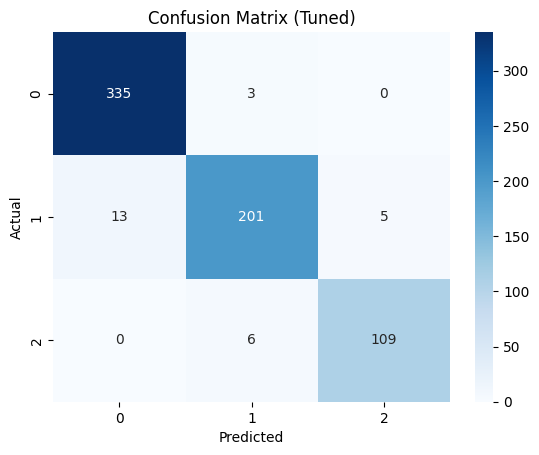

In [ ]:
# Using the best model from GridSearchCV
best_model = grid_search.best_estimator_

# Make predictions with the best model
y_pred_tuned = best_model.predict(X_test)

# Recalculating evaluation metrics
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
f1_tuned = f1_score(y_test, y_pred_tuned, average='weighted')
precision_tuned = precision_score(y_test, y_pred_tuned, average='weighted')
recall_tuned = recall_score(y_test, y_pred_tuned, average='weighted')

print(f"Accuracy (Tuned): {accuracy_tuned}")
print(f"F1-Score (Tuned): {f1_tuned}")
print(f"Precision (Tuned): {precision_tuned}")
print(f"Recall (Tuned): {recall_tuned}")

# Creating a confusion matrix after tuning
conf_matrix_tuned = confusion_matrix(y_test, y_pred_tuned)
sns.heatmap(conf_matrix_tuned, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Tuned)')
plt.show()

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
  - Apakah model mengalami overfitting atau underfitting?
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.

**Analisis Hasil Evaluasi Model Klasifikasi**
*   ***Sebelum tuning***
*   Accuracy: 0.9508928571428571
*   F1-Score: 0.9504782057344265
*   Precision: 0.9508879948591688
*   Recall: 0.9508928571428571
---
*   ***Setelah tuning***
*   Accuracy (Tuned): 0.9598214285714286
*   F1-Score (Tuned): 0.9595377735496073
*   Precision (Tuned): 0.9597380792910025
*   Recall (Tuned): 0.9598214285714286
---
Berdasarkan eksperimen yang telah dilakukan, diketahui bahwa hasil evaluasi mengalami peningkatan setelah dilakukan tuning dengan Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}

Tidak ada indikasi precision atau recall rendah untuk kelas tertentu karena nilai precision dan recall cukup seimbang (antara 0.95-0.96). Model tidak mengalami overfitting maupun underfitting secara signifikan, hal ini terlihat dari data uji yang menunjukkan performa tinggi baik sebelum dan setelah dilakukan tuning.

Rekomendasi lanjutan: mencoba menggunakan algoritma lain seperti Gradient Boosting (XGBoost, LightGBM) karena algoritma tersebut cenderung lebih baik untuk data dengan kompleksitas yang tinggi.